## Impor Dataset

In [1]:
import pandas as pd

# Impor dan lihat dataset
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Preprocessing

### Data Cleaning

In [2]:
# Lihat nilai-nilai yang mungkin untuk beberapa kolom
# Untuk dilihat outlier dan proses pembersihan nantinya

print("\nKategori\n" + "=" * 15)
print(df["Category"].value_counts())

print("\nPengguna Konten\n" + "=" * 15)
print(df["Content Rating"].value_counts())

print("\nTipe Harga\n" + "=" * 15)
print(df["Type"].value_counts())


Kategori
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Pengguna

In [3]:
print("Jumlah data sebelum pembersihan:", len(df))

# Buang nilai duplikat, NaN, dan outlier (observasi manual)
df.dropna(how = "any", inplace = True)
df.drop_duplicates(subset = ["App"], inplace = True)
df = df[df["Category"] != "1.9"]
df = df[df["Content Rating"] != "Unrated"]
df = df[df["Size"] != "Varies with device"]
df = df[df["Type"] != "0"]

print("Jumlah data sesudah pembersihan:", len(df))

Jumlah data sebelum pembersihan: 10841
Jumlah data sesudah pembersihan: 7020


In [4]:
def ubah_konten_rating(baris):
    # Gabungkan 18+ ke 17+ karena hanya terdapat 2 baris
    if baris["Content Rating"] == "Adults only 18+":
        baris["Content Rating"] = "Mature 17+"
    # Perjelas umur untuk remaja (13 tahun di sebagian besar Eropa)
    elif baris["Content Rating"] == "Teen":
        baris["Content Rating"] = "Teen 13+"
    return baris["Content Rating"]

df["Content Rating"] = df.apply(ubah_konten_rating, axis = 1)

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen 13+,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Baris kode setelah ini seharusnya termasuk bagian data reduction  
Namun, Jupyter akan crash bila dieksekusi belakangan  
Sehingga letaknya dipindah ke bagian data cleaning

In [6]:
# Buang kolom-kolom yang kurang penting
df.drop(["Genres", "Current Ver", "Android Ver"], axis = 1, inplace = True)

In [7]:
# Hapus tanda koma dan plus
df["Installs"].replace({
    ",": "",
    "\+": ""
}, regex = True, inplace = True)

# Ubah format juta dan ribuan ke digit nol
df["Size"].replace({
    "M": "000",
    "k": "00",
    "\.": ""
}, regex = True, inplace = True)

# Hapus dollar di depan angka
df["Price"].replace({
    "\$": ""
}, regex = True, inplace = True)
# Ubah dan perjelas nama kolom harga
df.columns.values[7] = "Dollar Price"

# Ubah beberapa kolom ke dalam format angka sepenuhnya
df[["Rating", "Price"]] = df[["Rating", "Price"]].astype(float)
df[["Installs", "Size"]] = df[["Installs", "Size"]].astype(int)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Dollar Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,0.0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen 13+,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,0.0,Everyone,"June 20, 2018"


### Data Reduction

In [8]:
# Translasi dan gabungkan beberapa kategori yang saling berhubungan

df["Category"].replace({
    "FAMILY": "Keluarga",
    "GAME": "Permainan",
    "TOOLS": "Utilitas",
    "MEDICAL": "Kedokteran",
    "BUSINESS": "Bisnis dan Keuangan",
    "PRODUCTIVITY": "Produktivitas",
    "PERSONALIZATION": "Personalisasi",
    "COMMUNICATION": "Sosial dan Komunikasi",
    "SPORTS": "Olahraga",
    "LIFESTYLE": "Gaya Hidup",
    "FINANCE": "Bisnis dan Keuangan",
    "HEALTH_AND_FITNESS": "Kesehatan dan Kebugaran",
    "PHOTOGRAPHY": "Fotografi dan Video",
    "SOCIAL": "Sosial dan Komunikasi",
    "NEWS_AND_MAGAZINES": "Berita dan Majalah",
    "SHOPPING": "Belanja",
    "TRAVEL_AND_LOCAL": "Travel dan Kultur",
    "DATING": "Percintaan",
    "BOOKS_AND_REFERENCE": "Buku dan Komik",
    "VIDEO_PLAYERS": "Fotografi dan Video",
    "EDUCATION": "Edukasi dan Pengasuhan",
    "ENTERTAINMENT": "Hiburan",
    "MAPS_AND_NAVIGATION": "Peta dan Cuaca",
    "FOOD_AND_DRINK": "Makanan dan Minuman",
    "HOUSE_AND_HOME": "Perumahan",
    "LIBRARIES_AND_DEMO": "Uji Coba dan Demo",
    "AUTO_AND_VEHICLES": "Kendaraan Otomotif",
    "WEATHER": "Peta dan Cuaca",
    "ART_AND_DESIGN": "Seni dan Desain",
    "EVENTS": "Acara",
    "PARENTING": "Edukasi dan Pengasuhan",
    "COMICS": "Buku dan Komik",
    "BEAUTY": "Kecantikan"
}, inplace = True)

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Dollar Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,Seni dan Desain,4.1,159,19000,10000,Free,0.0,Everyone,"January 7, 2018"
1,Coloring book moana,Seni dan Desain,3.9,967,14000,500000,Free,0.0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Seni dan Desain,4.7,87510,87000,5000000,Free,0.0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,Seni dan Desain,4.5,215644,25000,50000000,Free,0.0,Teen 13+,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,Seni dan Desain,4.3,967,28000,100000,Free,0.0,Everyone,"June 20, 2018"


## Data Processing

### Lihat Sebaran Kategori Aplikasi

Banyak data: 7020
Jumlah kategori: 27
Sebaran kategori: {'Keluarga': 1511, 'Permainan': 832, 'Utilitas': 624, 'Bisnis dan Keuangan': 480, 'Sosial dan Komunikasi': 344, 'Fotografi dan Video': 316, 'Personalisasi': 274, 'Gaya Hidup': 269, 'Kedokteran': 266, 'Produktivitas': 223, 'Olahraga': 221, 'Kesehatan dan Kebugaran': 191, 'Buku dan Komik': 188, 'Berita dan Majalah': 154, 'Belanja': 146, 'Peta dan Cuaca': 144, 'Travel dan Kultur': 141, 'Edukasi dan Pengasuhan': 132, 'Percintaan': 122, 'Makanan dan Minuman': 72, 'Hiburan': 64, 'Kendaraan Otomotif': 63, 'Uji Coba dan Demo': 60, 'Seni dan Desain': 58, 'Perumahan': 50, 'Acara': 38, 'Kecantikan': 37}


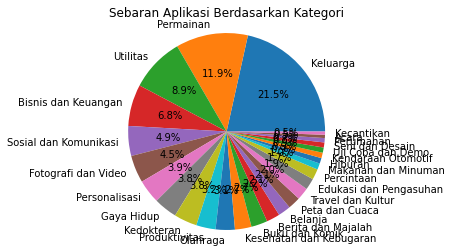

In [10]:
import matplotlib.pyplot as plt

# Tampilkan total data (untuk perkiraan persentasi)
print("Banyak data:", len(df))
print("Jumlah kategori:", len(df["Category"].unique()))

plt.pie(
    x = df["Category"].value_counts().to_dict().values(),
    labels = df["Category"].value_counts().to_dict().keys(),
    autopct = "%1.1f%%"
)

print("Sebaran kategori:", df["Category"].value_counts().to_dict())
plt.title("Sebaran Aplikasi Berdasarkan Kategori")
plt.axis("equal")
plt.show()

### Lihat Sebaran Rating (Skor) Aplikasi

Rating aplikasi rata-rata: 4.160712250712251
Sebaran rating aplikasi: {1.0: 16, 1.2: 1, 1.4: 3, 1.5: 3, 1.6: 4, 1.7: 8, 1.8: 8, 1.9: 10, 2.0: 11, 2.1: 8, 2.2: 14, 2.3: 20, 2.4: 19, 2.5: 18, 2.6: 23, 2.7: 21, 2.8: 40, 2.9: 43, 3.0: 72, 3.1: 62, 3.2: 58, 3.3: 96, 3.4: 113, 3.5: 147, 3.6: 152, 3.7: 191, 3.8: 257, 3.9: 312, 4.0: 448, 4.1: 533, 4.2: 671, 4.3: 719, 4.4: 722, 4.5: 689, 4.6: 563, 4.7: 390, 4.8: 205, 4.9: 84, 5.0: 266}


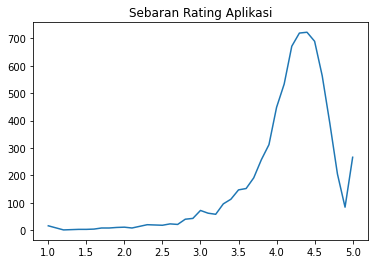

In [11]:
# Urutkan data berdasarkan rating terkecil ke terbesar
temp = dict(sorted(
    df["Rating"].value_counts().to_dict().items()
))

print("Rating aplikasi rata-rata:", df["Rating"].mean())
print("Sebaran rating aplikasi:", temp)

plt.title("Sebaran Rating Aplikasi")
plt.plot(temp.keys(), temp.values())
plt.show()

### Lihat Sebaran Ukuran Aplikasi

Rata-rata ukuran aplikasi: 41000.22792022792
Sebaran ukuran aplikasi: {1400: 1, 1700: 2, 1800: 1, 2000: 1, 2300: 1, 2400: 1, 2500: 1, 2600: 2, 2700: 1, 2800: 1, 2900: 2, 3300: 1, 3400: 1, 3900: 1, 4100: 1, 4500: 1, 4800: 1, 5000: 1, 5100: 2, 5400: 1, 5500: 1, 5800: 2, 6100: 1, 7000: 2, 7200: 1, 7300: 1, 7400: 1, 7800: 1, 7900: 2, 8100: 1, 8200: 1, 8500: 1, 8900: 1, 9100: 1, 9300: 1, 10000: 92, 10300: 1, 11000: 168, 11600: 1, 11800: 2, 12000: 176, 12100: 1, 12200: 1, 13000: 170, 14000: 172, 14100: 2, 14300: 1, 14400: 1, 15000: 175, 15300: 1, 15400: 1, 16000: 138, 16100: 1, 16400: 1, 16900: 1, 17000: 146, 17300: 1, 17500: 1, 17600: 1, 18000: 130, 18600: 1, 19000: 133, 19200: 2, 19300: 1, 19600: 2, 20000: 135, 20100: 3, 20300: 1, 20600: 1, 20800: 1, 20900: 1, 21000: 136, 21900: 1, 22000: 130, 22100: 1, 22600: 1, 22800: 2, 23000: 143, 23200: 1, 23400: 1, 23900: 1, 24000: 140, 24100: 1, 24600: 1, 25000: 166, 25100: 1, 25300: 1, 25700: 1, 25900: 1, 26000: 141, 26600: 3, 27000: 124, 28000: 12

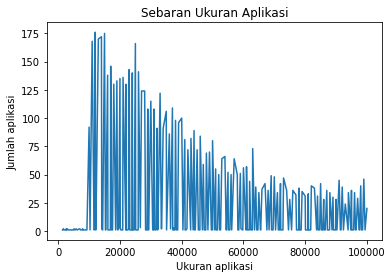

In [12]:
# Urutkan data berdasarkan ukuran terkecil ke terbesar
temp = dict(sorted(
    df["Size"].value_counts().to_dict().items()
))

print("Rata-rata ukuran aplikasi:", df["Size"].mean())
print("Sebaran ukuran aplikasi:", temp)

plt.title("Sebaran Ukuran Aplikasi")
plt.plot(temp.keys(), temp.values())
plt.xlabel("Ukuran aplikasi")
plt.ylabel("Jumlah aplikasi")
plt.show()

### Lihat Sebaran Rating Umur Aplikasi

Sebaran rating konten (jumlah): {'Everyone': 5676, 'Teen 13+': 779, 'Mature 17+': 306, 'Everyone 10+': 259}
Sebaran rating konten (persentasi): {'Everyone': 80.85470085470085, 'Teen 13+': 11.096866096866096, 'Mature 17+': 4.358974358974359, 'Everyone 10+': 3.68945868945869}


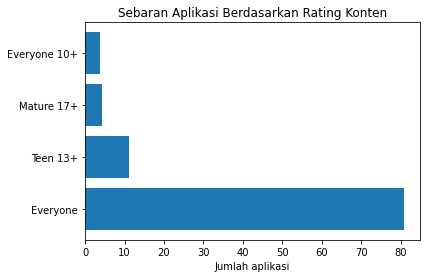

In [13]:
import matplotlib.pyplot as plt

temp = (df["Content Rating"].value_counts(normalize=True) * 100).to_dict()

# Tampilkan sebaran rating konten
print("Sebaran rating konten (jumlah):", df["Content Rating"].value_counts().to_dict())
print("Sebaran rating konten (persentasi):", temp)

plt.barh(
    list(temp.keys()),
    list(temp.values())
)

plt.title("Sebaran Aplikasi Berdasarkan Rating Konten")
plt.xlabel("Jumlah aplikasi")
plt.show()

### Lihat Aplikasi Terbaik dan Terpopuler

In [14]:
# Tambahkan kolom koordinat ke dataframe
df["Final Rate"] = df.apply(lambda x: x["Rating"] * x["Installs"], axis = 1)
temp = df.sort_values("Final Rate", ascending = False)
temp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Dollar Price,Content Rating,Last Updated,Final Rate
1654,Subway Surfers,Permainan,4.5,27722264,76000,1000000000,Free,0.0,Everyone 10+,"July 12, 2018",4.500000e+09
3736,Google News,Berita dan Majalah,3.9,877635,13000,1000000000,Free,0.0,Teen 13+,"August 1, 2018",3.900000e+09
3255,SHAREit - Transfer & Share,Utilitas,4.6,7790693,17000,500000000,Free,0.0,Everyone,"July 30, 2018",2.300000e+09
378,UC Browser - Fast Download Private & Secure,Sosial dan Komunikasi,4.5,17712922,40000,500000000,Free,0.0,Teen 13+,"August 2, 2018",2.250000e+09
3473,Dropbox,Produktivitas,4.4,1861310,61000,500000000,Free,0.0,Everyone,"August 1, 2018",2.200000e+09


In [15]:
df.drop("Final Rate", axis = 1, inplace = True)

### Lihat Ukuran Pada 50 Aplikasi Terpopuler

In [16]:
temp = temp[:50]
ukuran = temp["Size"].value_counts().to_dict()
print("Kategori Ukuran dari 50 Aplikasi Terpopuler:", ukuran)

Kategori Ukuran dari 50 Aplikasi Terpopuler: {17000: 3, 74000: 3, 76000: 2, 53000: 2, 99000: 2, 94000: 2, 57000: 2, 14000: 2, 15000: 2, 40000: 2, 95000: 1, 75000: 1, 26000: 1, 92000: 1, 60000: 1, 34000: 1, 79000: 1, 82000: 1, 67000: 1, 35000: 1, 52000: 1, 58000: 1, 100000: 1, 13000: 1, 37000: 1, 25000: 1, 97000: 1, 96000: 1, 88000: 1, 78000: 1, 98000: 1, 16000: 1, 11000: 1, 70000: 1, 62000: 1, 24000: 1, 61000: 1, 89000: 1}


### Lihat Tipe Pada 50 Aplikasi Terpopuler

In [17]:
tipe = temp["Type"].value_counts().to_dict()
print("Tipe dari 50 Aplikasi Terpopuler:", tipe)

Tipe dari 50 Aplikasi Terpopuler: {'Free': 50}


### Lihat Kategori Umur Pada 50 Aplikasi Terpopuler

In [18]:
umur = temp["Content Rating"].value_counts().to_dict()
print("Kategori Umur dari 50 Aplikasi Terpopuler:", umur)

Kategori Umur dari 50 Aplikasi Terpopuler: {'Everyone': 36, 'Teen 13+': 8, 'Everyone 10+': 6}


## Ekspor Dataset

In [19]:
# Ekspor dataset yang telah diolah
# df.to_csv("googleplaystore_out.csv", index = False)